## Regularization
### Controlling overfitting by restricting paramters
### Making output more interpretable

In [1]:
%load_ext autoreload
%autoreload 2
import helper
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

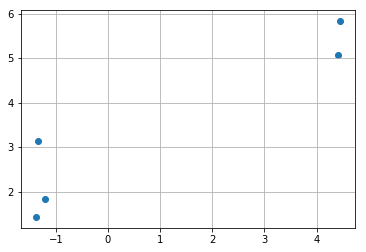

In [2]:
# One main use of regularization is to smooth model-nonconforming model irregularities

# the most basic example of the uses of regularization
# Least Squares linear regression has too high of a tendency to overfit to far outliers
# Ridge regression adds a (w @ w) term to the loss


def gen_hetroskedastic_data(num=5):
    """
    Generate a linear trend with additive gaussian noise, and some masked, asymmetric "shot" noise
    """
    X = npr.uniform(-5, 5, size=num)
    Y = 3 + 0.5 * X
    
    gnoise = npr.normal(scale=1, size=num)
    
    shotnoise = 0* npr.uniform(-10, 10, size=num)
    shotmask = npr.binomial(1, p=0.1, size=num)
    
    Y += gnoise
    Y += shotmask * shotnoise
    
    return X, Y
    
X, Y = gen_hetroskedastic_data()
_ = plt.scatter(X, Y)
plt.grid()

In [3]:
from sklearn.linear_model import Ridge
from ipywidgets import interact
import ipywidgets as widgets

def fit_ridge(alpha=0.):
    model = Ridge(alpha=alpha)
    model.fit(X[:, np.newaxis], Y)
    
    X_lin = np.linspace(-5, 5, num=1000)
    plt.scatter(X, Y, marker='+')
    plt.plot(X_lin, model.predict(X_lin[:, np.newaxis]), color='red')
    plt.plot(X_lin, 3 + 0.5 * X_lin, color='green')
    plt.grid()
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.gcf().set_size_inches(14, 8)
    
interact(fit_ridge, alpha=widgets.FloatLogSlider(min=-1, max=3, step=1/5, value=0));

interactive(children=(FloatLogSlider(value=0.1, description='alpha', max=3.0, min=-1.0, step=0.2), Output()), …

In [4]:
# The illustration above is mediocre in one dimension, but we can quantify some results in higher dimensions:

from sklearn.model_selection import train_test_split

def get_high_d_data(useful_dim=5, dim=20, num=100):
        
    
    if (useful_dim >= dim // 2):
        print("Lowering useful_dim")
        useful_dim = dim // 2
    
    if (dim >= num):
        print("Underdetermined system: raising number of samples!")
        num = dim + 1
        
    npr.seed(1337)
    true_W = npr.uniform(-1, 1, size=(dim,))
    true_W[useful_dim:] = 0
    true_b = 3
    
    npr.seed(1340)
    X = npr.uniform(-5, 5, size=(num, dim))
    npr.seed(1338)
    Y = X @ true_W + true_b + npr.normal(scale=1, loc=0, size=(num,))
    
    npr.seed(1339)
    Xt, Xv, Yt, Yv = train_test_split(X, Y)
    
    return true_W, Xt, Xv, Yt, Yv

In [5]:
# another use of regularization is to induce sparsity
# here, L1 regularization, which penalizes sum(abs(w)), or ||w||_1, is shown:

# This is useful for high dimensional data, where a small number of explanatory variables is desired

from sklearn.linear_model import Ridge, Lasso
def train_high_d_ridge(model='ridge', alpha=0.1, useful_dim=5, dim=20, num=100):
    """
    Generates data in a variable number of dimensions, only some of which are useful.
    """

    true_W, Xt, Xv, Yt, Yv = get_high_d_data(useful_dim, dim, num)
    
    if model == 'ridge':
        model = Ridge(alpha=alpha).fit(Xt, Yt)
    else:
        model = Lasso(alpha=alpha).fit(Xt, Yt)
    
    plt.scatter(np.arange(dim), true_W, label="True coefficients")
    plt.scatter(np.arange(dim), model.coef_, label="Predicted coefficients")
    plt.ylim((-1, 1))
    plt.legend()
    plt.xlabel("Weight index")
    plt.ylabel("Weight value")
    plt.gcf().set_size_inches(14, 8)
    
    print("Validation score: ", model.score(Xv, Yv))
    
interact(
    train_high_d_ridge,
    alpha=widgets.FloatLogSlider(min=-1, max=3, step=1/3, value=0),
    dim=widgets.IntSlider(min=1, max=50, value=25),
    num=widgets.IntSlider(min=1, max=50, value=25),
    useful_dim=widgets.IntSlider(min=1, max=25, value=10),
    model=widgets.RadioButtons(options=['ridge', 'lasso']),
);

interactive(children=(RadioButtons(description='model', options=('ridge', 'lasso'), value='ridge'), FloatLogSl…